# <b><div style='padding:8px;background-color:#003f88;color:white;border-radius:2px;font-size:100%;text-align: left'>AI Powered Book Recommendation System Using Collaborative Filtering</div></b>

## Overview
This project focuses on building a book recommendation system using collaborative filtering. Collaborative filtering is a technique used in recommendation systems to predict user preferences by collecting preferences from many users. The goal is to recommend books to users based on their past interactions and similarities with other users.

## Project Objective
The aim of this project is to develop a collaborative filtering-based recommendation system to suggest books to users. The project will cover the complete pipeline, including data loading, exploratory data analysis, data preparation, model building, evaluation, and visualization.

---

## Problem Statement
A book recommendation system enhances user experience by suggesting titles tailored to individual preferences, making it easier for users to discover books they are likely to enjoy. For online bookstores, this can lead to increased engagement, higher conversion rates, and greater customer satisfaction. By analyzing user behavior and leveraging collaborative filtering, the system helps match readers with books they may not have found otherwise, thereby boosting sales and encouraging repeat visits.

---

In [2]:
# Import Libriaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Collection

In [4]:
ratings_df = pd.read_csv("C:/Users/Harrison/Downloads/Recommendation_project/data/ratings.csv")
books_df = pd.read_csv("C:/Users/Harrison/Downloads/Recommendation_project/data/books.csv")

In [5]:
# Display the first 5 rows of rating dataset
ratings_df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [6]:
# Check the info about the data
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [7]:
# Check unique book_id in ratings datatset
unique_book_ids = ratings_df['book_id'].unique()
print(f"Number of unique book_ids: {len(unique_book_ids)}")
print("Sample book_ids:", unique_book_ids[:10])


Number of unique book_ids: 10000
Sample book_ids: [ 1  2  3  4  5  6  7  8  9 10]


In [8]:
# Check the summary statistics of the dataset
ratings_df.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


In [9]:
# Display the first 5 rows of books dataset
books_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [10]:
# Check the summary statistics of the dataset
books_df.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [11]:
# Check unique id in books dataset
unique_book_ids = books_df['id'].unique()
print(f"Number of unique book_ids: {len(unique_book_ids)}")
print("Sample book_ids:", unique_book_ids[:10])


Number of unique book_ids: 10000
Sample book_ids: [ 1  2  3  4  5  6  7  8  9 10]


In [12]:
# Check the info about the data
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

## Exploratory Data Analysis (EDA)

### 📊 Ratings Dataset EDA (ratings_df)

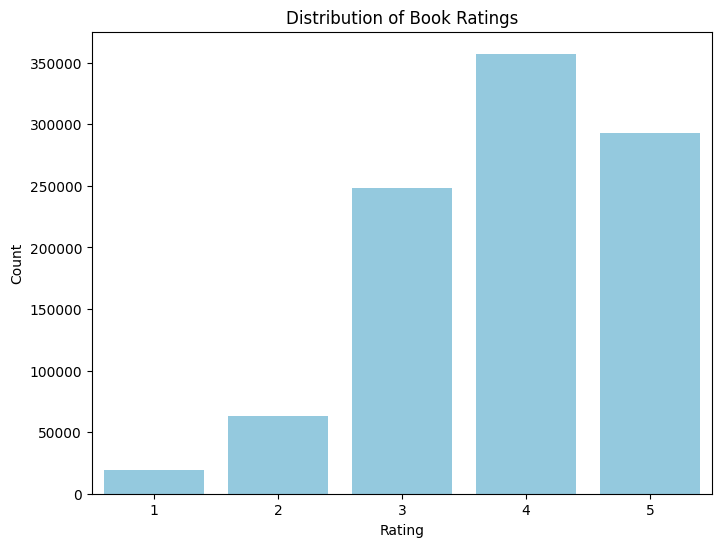

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=ratings_df, color='skyblue')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The graph shows the distribution of book ratings on a scale from 1 to 5. The x-axis represents the rating, while the y-axis shows the count or number of books with each rating.

The key insights from the graph are:

1. The majority of books have a rating of 4, with the highest count of around 320,000 books.
2. The second highest count is for books with a rating of 5, at around 280,000.
3. The count decreases as the rating goes down, with the lowest count being for books with a rating of 1.
4. The distribution is skewed towards the higher ratings, with more books having ratings of 4 and 5 compared to the lower ratings.

Overall, the graph provides a visual representation of the distribution of book ratings, highlighting the popularity of higher-rated books in the dataset.

**a. Number of Ratings per Book**
- Find out how many ratings each book has received.

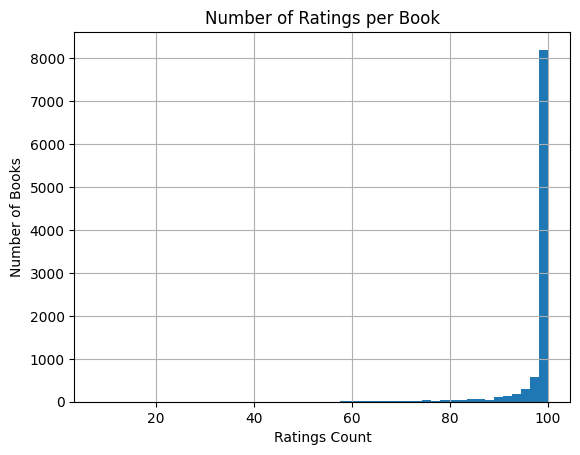

In [14]:
ratings_per_book = ratings_df['book_id'].value_counts()
ratings_per_book.hist(bins=50)
plt.title("Number of Ratings per Book")
plt.xlabel("Ratings Count")
plt.ylabel("Number of Books")
plt.show()


This histogram shows the distribution of ratings across books in the dataset. Most books have received close to 100 ratings, indicating a skewed distribution where a small number of popular books dominate the rating activity. This imbalance is typical in real-world recommendation systems and highlights the need for techniques like collaborative filtering to ensure less popular books can still be recommended based on user similarity.

**b. Average Rating per Book**
- Identify the books with the highest and lowest average ratings.

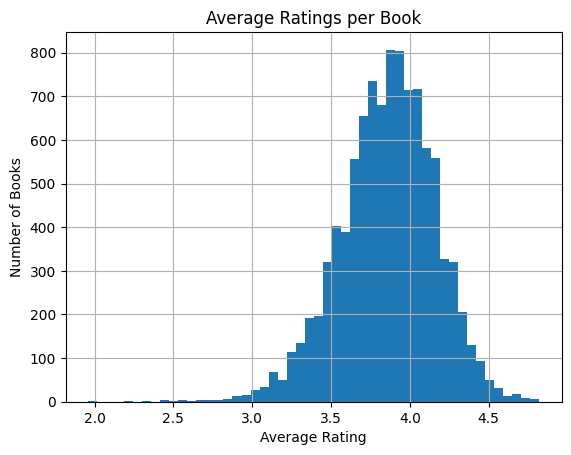

In [15]:
avg_ratings = ratings_df.groupby('book_id')['rating'].mean()
avg_ratings.hist(bins=50)
plt.title("Average Ratings per Book")
plt.xlabel("Average Rating")
plt.ylabel("Number of Books")
plt.show()


This histogram shows the distribution of average ratings across all books in the dataset. Most books have an average rating between 3.5 and 4.2, indicating generally favorable user sentiment. The distribution is slightly skewed to the left, suggesting that lower-rated books are less common.

**c. Ratings per User**
- Analyze how active users are by calculating how many ratings each user has given.

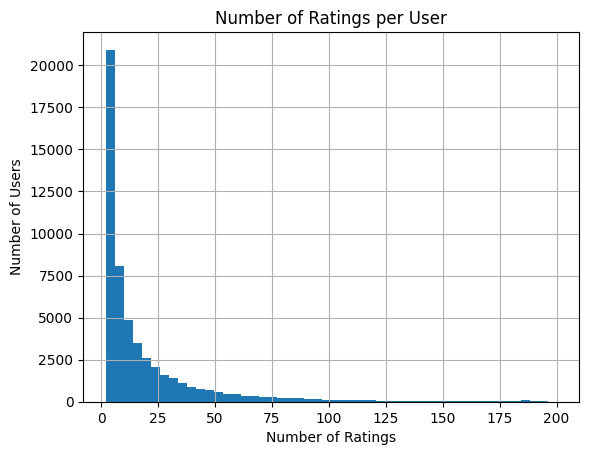

In [16]:
ratings_per_user = ratings_df['user_id'].value_counts()
ratings_per_user.hist(bins=50)
plt.title("Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()


The graph shows the "Number of Ratings per User" distribution. It depicts the number of users (y-axis) who have provided a certain number of ratings (x-axis).e:

1. The majority of users have provided a relatively small number of ratings, with a large number of users having made 25 or fewer ratings.
2. The distribution is heavily skewed towards the lower end, with the number of users decreasing rapidly as the number of ratings increases.
3. There are a few users who have provided a very large number of ratings, up to around 200 ratings per user.
4. The graph demonstrates the typical long-tail distribution of user engagement, where a small number of users are highly active, while the majority of users have a lower level of engagement.

This information can provide valuable insights into the user behavior and engagement patterns within the rating system.

**d. Top Users and Books**
- Identify the top 10 most active users and the most rated books.

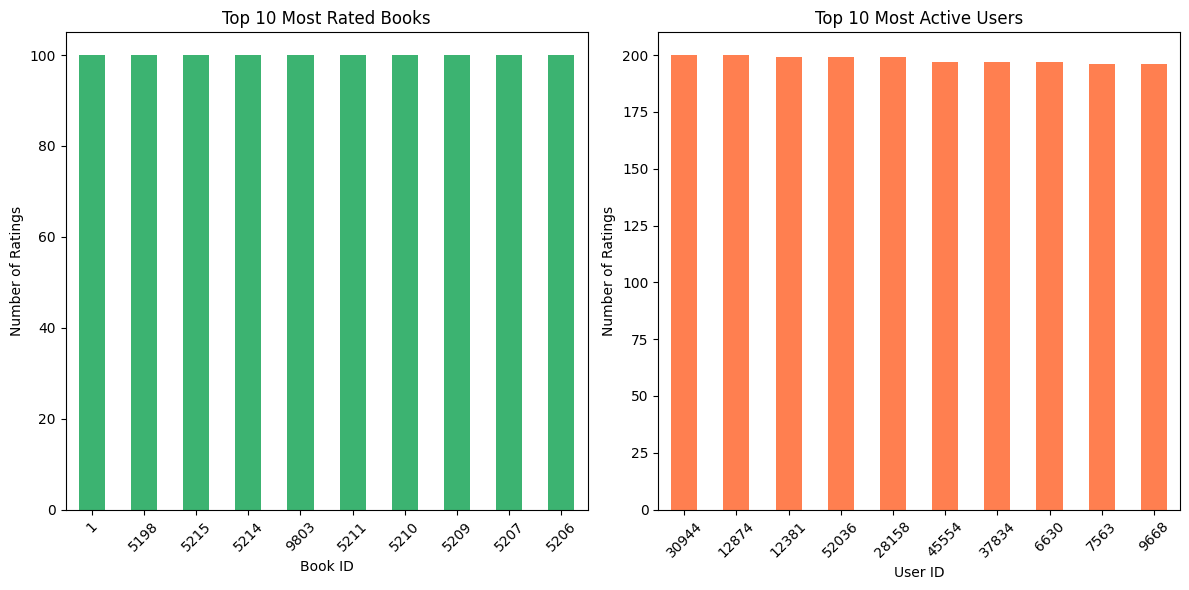

In [17]:
# Get top 10 most rated books and most active users
top_books = ratings_df['book_id'].value_counts().head(10)
top_users = ratings_df['user_id'].value_counts().head(10)

# Create side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the top 10 most rated books
top_books.plot(kind='bar', color='mediumseagreen', ax=axes[0])
axes[0].set_title('Top 10 Most Rated Books')
axes[0].set_xlabel('Book ID')
axes[0].set_ylabel('Number of Ratings')
axes[0].tick_params(axis='x', rotation=45)

# Plot the top 10 most active users
top_users.plot(kind='bar', color='coral', ax=axes[1])
axes[1].set_title('Top 10 Most Active Users')
axes[1].set_xlabel('User ID')
axes[1].set_ylabel('Number of Ratings')
axes[1].tick_params(axis='x', rotation=45)

# Improve layout and display plot
plt.tight_layout()
plt.show()


The left chart shows the top 10 most rated books, each receiving exactly 100 ratings, indicating equal popularity among these titles. The right chart displays the top 10 most active users, with each having given around 195–200 ratings, highlighting the key contributors to the platform’s engagement.

## 📚 Books Dataset EDA (books_df)

**a. Top Authors by Number of Books**
- Which authors appear most frequently in the dataset?

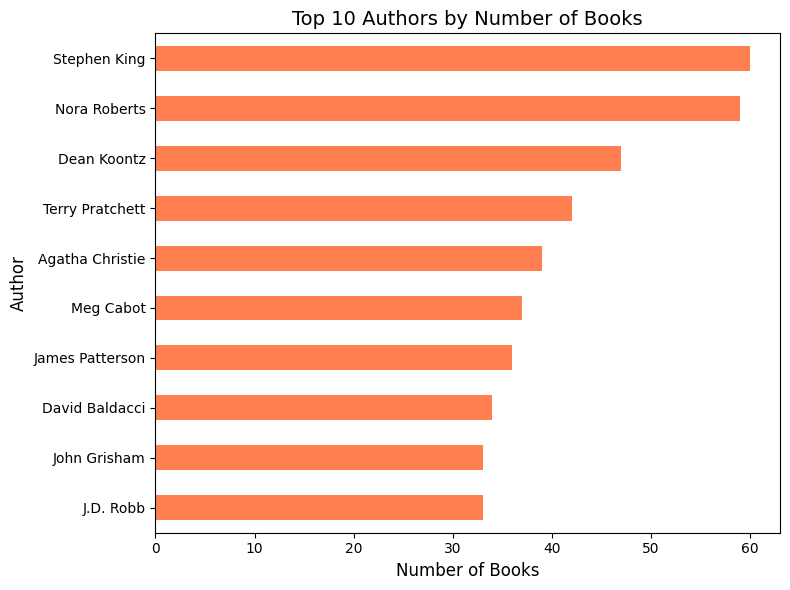

In [18]:
import matplotlib.pyplot as plt

# Get the top 10 authors with the most books, in descending order
top_authors = books_df['authors'].value_counts().head(10).sort_values(ascending=True)

# Set the size of the figure
plt.figure(figsize=(8, 6))

# Plot horizontal bar chart
top_authors.plot(kind='barh', color='coral')

# Add chart title and axis labels
plt.title("Top 10 Authors by Number of Books", fontsize=14)
plt.xlabel("Number of Books", fontsize=12)
plt.ylabel("Author", fontsize=12)

# Layout adjustment
plt.tight_layout()

# Show plot
plt.show()

The graph shows the "Top 10 Authors by Number of Books". It displays the number of books written by the top 10 most prolific authors in the dataset.

The key insights from this graph are:

1. Stephen King is the most prolific author, with the highest number of books at around 60.
2. Nora Roberts and Dean Koontz are the next two most prolific authors, with around 50 and 40 books, respectively.
3. Terry Pratchett, Agatha Christie, and Meg Cabot are also among the top 10 authors, each with a significant number of books.
4. The graph demonstrates a clear hierarchy, with Stephen King being the most prolific author, followed by a few other highly productive authors, and then a gradual decrease in the number of books for the remaining authors in the top 10.

This information can provide valuable insights into the most influential and successful authors, which could be useful for various applications, such as book recommendations, author marketing, or literary analysis.

**b. Books with the Highest Ratings**
- Use the joined dataset to find the books with the highest average rating.

In [19]:
book_ratings = ratings_df.groupby('book_id')['rating'].mean()
book_ratings_df = book_ratings.reset_index().merge(books_df, on='book_id')
top_rated_books = book_ratings_df.sort_values(by='rating', ascending=False).head(10)
top_rated_books[['book_id', 'title', 'rating']]


,book_id,title,rating
769,9566,Still Life with Woodpecker,4.777778
354,4708,The Beautiful and Damned,4.660000
771,9569,Villa Incognito,4.618557
762,9531,Peter and the Shadow Thieves (Peter and the St...,4.557143
291,3885,The Taste of Home Cookbook,4.550000
206,2767,A People's History of the United States,4.540000
448,5344,Hard Times,4.535354
210,2865,Girl with a Pearl Earring,4.530000
95,976,Deception Point,4.500000
786,9712,Love in the Time of Cholera,4.500000


The table displays a list of book titles along with their corresponding book IDs, titles, and rating scores. Here are the key insights:

1. The table shows the top 10 books based on their rating scores, which range from 4.500000 to 4.777778.
2. The book with the highest rating is "Still Life with Woodpecker" with a score of 4.777778.
3. Other highly-rated books include "The Beautiful and Damned" (4.660000), "Villa Incognito" (4.618557), and "Peter and the Shadow Thieves" (4.557143).
4. The table provides a concise overview of the top-rated books, allowing users to quickly identify the most well-received titles in the dataset.
5. This information can be useful for book recommendations, customer reviews, or literary analysis, as it highlights the most popular and highly-regarded books based on their rating scores.

**c. Publication Year Analysis**
- Analyze the trend of book publications over time.

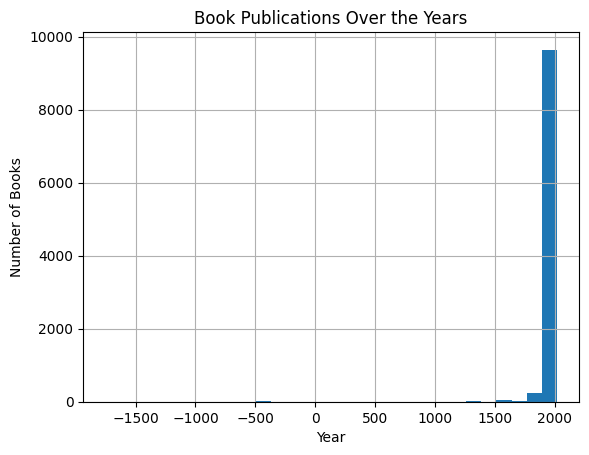

In [20]:
books_df['original_publication_year'].dropna().astype(int).hist(bins=30)
plt.title("Book Publications Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Books")
plt.show()


The chart illustrates the number of books published over time. A sharp increase is observed in the 20th and 21st centuries, reflecting the boom in publishing activity in modern times. Earlier years show minimal publication, with some anomalies likely due to data entry errors.

**d. Book Title and Author Uniqueness**
- Check for duplicate titles or authors to assess data quality.

In [21]:
duplicate_titles = books_df['title'].duplicated().sum()
duplicate_authors = books_df['authors'].duplicated().sum()

print(f"Duplicate Titles: {duplicate_titles}")
print(f"Duplicate Authors: {duplicate_authors}")


Duplicate Titles: 36
Duplicate Authors: 5336


**a. Top Rated Books with Minimum Number of Ratings**
- Find the top books that have a high average rating and at least 50 ratings (to avoid skewed high ratings from very few users).

In [23]:
# Merge ratings and books dataframes on 'book_id'
merged = ratings_df.merge(books_df, on='book_id')

# Compute average rating and number of ratings per book title
book_stats = merged.groupby('title').agg({'rating': ['mean', 'count']})
book_stats.columns = ['average_rating', 'num_ratings']

# Filter books with at least 50 ratings and sort by average rating
top_books = book_stats[book_stats['num_ratings'] >= 50].sort_values(by='average_rating', ascending=False).head(10)

# Enable interactive table display in Google Colab
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

# Display the resulting top_books
top_books


,average_rating,num_ratings
title,,
Still Life with Woodpecker,4.777778,99
The Beautiful and Damned,4.660000,100
Villa Incognito,4.618557,97
"Peter and the Shadow Thieves (Peter and the Starcatchers, #2)",4.557143,70
The Taste of Home Cookbook,4.550000,100
A People's History of the United States,4.540000,100
Hard Times,4.535354,99
Girl with a Pearl Earring,4.530000,100
Love in the Time of Cholera,4.500000,94


This table lists the top 10 highest-rated books based on average user ratings. All books have high average ratings (above 4.5), with most receiving close to 100 ratings. *Still Life with Woodpecker* holds the highest rating among them at 4.78.

**b. Correlation Between Average Rating and Number of Ratings**
- Use scatter plots to visualize any correlation between average ratings and number of ratings.

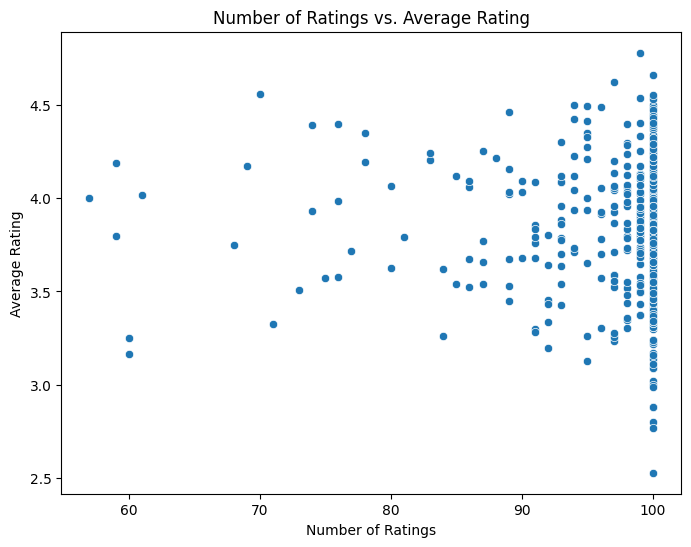

In [24]:
# Set the size of the figure
plt.figure(figsize=(8, 6))

sns.scatterplot(data=book_stats, x='num_ratings', y='average_rating')
plt.title("Number of Ratings vs. Average Rating")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.show()


This scatter plot displays the relationship between the number of ratings a book received and its average rating. While most books have close to 100 ratings, their average ratings vary widely, suggesting that a higher number of ratings does not necessarily correlate with a higher or lower average rating.